In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing the dataset
df=pd.read_csv('zomato.csv',encoding='latin-1')
#to avoid encoding error , use unicode_escape
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
#Dataset index
df.index

RangeIndex(start=0, stop=9551, step=1)

In [4]:
#dataset columns
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
#All the below columns have only few unique values in them thats y we will convert them into 'category' datatype

In [7]:
df['Has Online delivery'].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
df['Has Table booking'].unique()

array(['Yes', 'No'], dtype=object)

In [9]:
df['Is delivering now'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
df['Switch to order menu'].unique()

array(['No'], dtype=object)

In [11]:
df['Rating color'].unique()

array(['Dark Green', 'Green', 'Yellow', 'Orange', 'White', 'Red'],
      dtype=object)

In [12]:
df['Rating text'].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [13]:
df['Has Online delivery']=df['Has Online delivery'].astype('category')
df['Has Table booking']=df['Has Table booking'].astype('category')
df['Is delivering now']=df['Is delivering now'].astype('category')
df['Switch to order menu']=df['Switch to order menu'].astype('category')
df['Rating color']=df['Rating color'].astype('category')
df['Rating text']=df['Rating text'].astype('category')

#All the above columns has been converted to 'categorical' datatype

In [14]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [15]:
#Thus all the columns are in proper datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Restaurant ID         9551 non-null   int64   
 1   Restaurant Name       9551 non-null   object  
 2   Country Code          9551 non-null   int64   
 3   City                  9551 non-null   object  
 4   Address               9551 non-null   object  
 5   Locality              9551 non-null   object  
 6   Locality Verbose      9551 non-null   object  
 7   Longitude             9551 non-null   float64 
 8   Latitude              9551 non-null   float64 
 9   Cuisines              9542 non-null   object  
 10  Average Cost for two  9551 non-null   int64   
 11  Currency              9551 non-null   object  
 12  Has Table booking     9551 non-null   category
 13  Has Online delivery   9551 non-null   category
 14  Is delivering now     9551 non-null   category
 15  Swit

In [16]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [17]:
#Finding null values

In [18]:
df.isnull().sum() #Cuisines have null values 

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [19]:
#Another way to see null values in a column
[x for x in df.columns if df[x].isnull().sum()>0]

['Cuisines']

In [20]:
#let us see our other dataset
df_country=pd.read_excel('Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [21]:
df_country.shape

(15, 2)

In [22]:
df_country.nunique()

Country Code    15
Country         15
dtype: int64

In [23]:
#We will now merge both the datasets
final_df=pd.merge(df,df_country,on='Country Code',how='left')
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [24]:
#To check datatypes
final_df.dtypes

Restaurant ID              int64
Restaurant Name           object
Country Code               int64
City                      object
Address                   object
Locality                  object
Locality Verbose          object
Longitude                float64
Latitude                 float64
Cuisines                  object
Average Cost for two       int64
Currency                  object
Has Table booking       category
Has Online delivery     category
Is delivering now       category
Switch to order menu    category
Price range                int64
Aggregate rating         float64
Rating color            category
Rating text             category
Votes                      int64
Country                   object
dtype: object

In [25]:
country_name=final_df['Country'].value_counts().index
country_val=final_df['Country'].value_counts().values

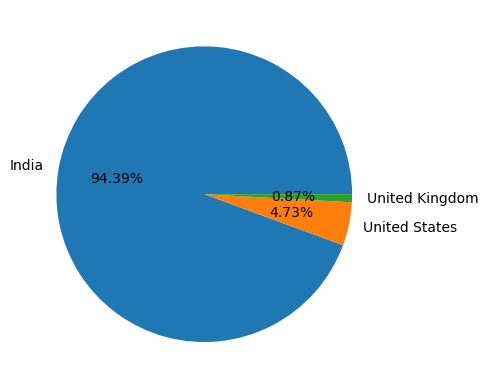

In [26]:
#Pie Chart-- Top 3 Countries that uses Zomato
plt.pie(country_val[0:3],labels=country_name[0:3],autopct='%1.2f%%')
plt.show()

## Observation 1 :
1.1 - Zomato most transactions/records are from India followed by United States and United Kingdom

In [27]:
#Making a dataframe that contains 'Aggregate rating','Rating color','Rating text' as their columns
ratings=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating counts'})

C:\Users\siddh\AppData\Local\Temp\ipykernel_10944\2115753494.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratings=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating counts'})


In [28]:
#Removing Unneccesary columns from the dataframe
ratings=ratings[ratings['Rating counts']>0]
ratings.reset_index(drop=True,inplace=True)
ratings  #hence we have the final dataframe

,Aggregate rating,Rating color,Rating text,Rating counts
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


## Observation 2 :

2.1 - The Aggregate rating that ranges from 1.8 to 2.4 have Rating Color Red and Rating text as Poor<br>
2.2 - The Aggregate rating that ranges from 2.5 to 3.4 have Rating Color Orange and Rating text as Average<br>
2.3 - The Aggregate rating that ranges from 3.5 to 3.9 have Rating Color Yellow and Rating text as Good<br>
2.4 - The Aggregate rating that ranges from 4.0 to 4.4 have Rating Color Green and Rating text as Very Good<br>
2.5 - The Aggregate rating that ranges from 4.5 to 4.9 have Rating Dark Green and Rating text as Excellent<br>
2.6 - Maximum number of Peoples have not provided any Ratings<br> 

C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Aggregate rating', ylabel='Rating counts'>

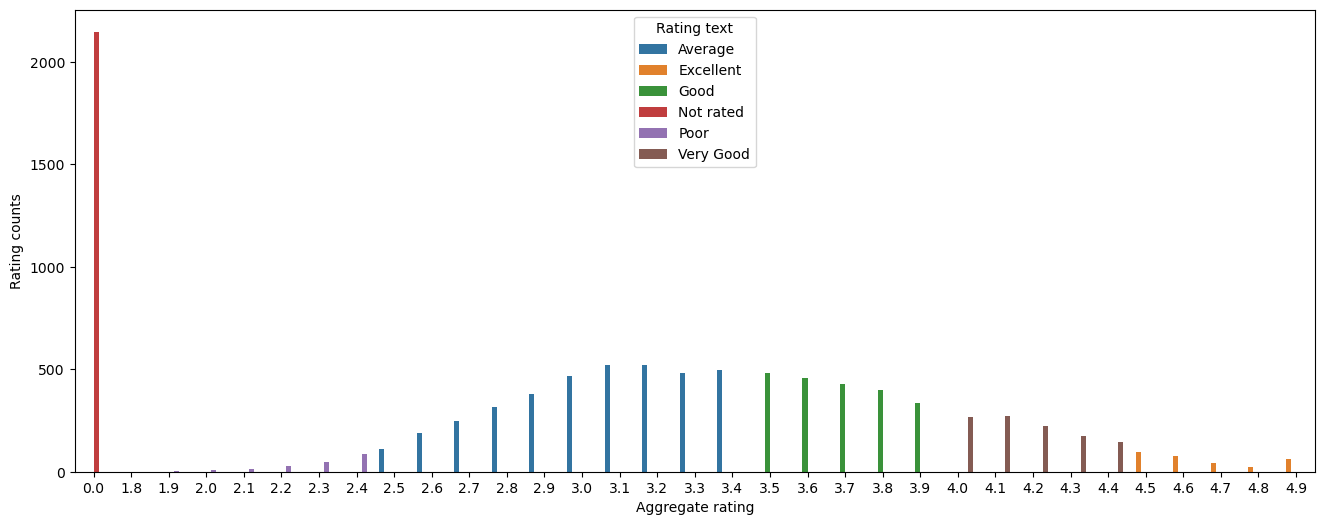

In [29]:
#barplot for more obervation
plt.figure(figsize=(16,6))
sns.barplot(data=ratings,x='Aggregate rating',y='Rating counts',hue='Rating text')

## Observation 3 :

3.1 - Maximum Number Of People does not rated<br> 
3.2 - Maximum Ratings are between 2.5 to 3.4<br>

C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\siddh\anaconda3\envs\pandas_playground\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Rating color', ylabel='count'>

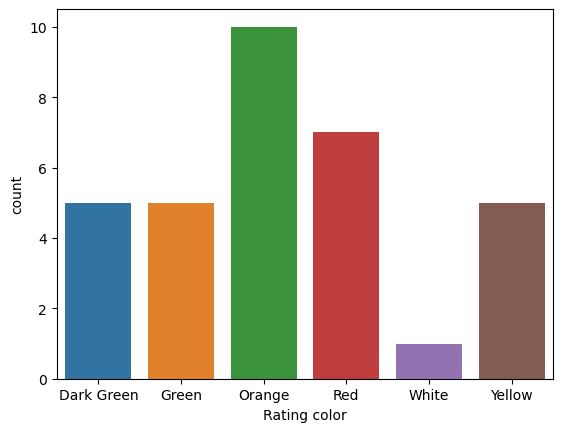

In [30]:
#Countplot for Colors of Ratings
sns.countplot(x='Rating color', data=ratings)

## Observation 4 :
4.1-Maximum NUmber of People have given Average Rating(Orange Color)

In [31]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [32]:
#Name of the Countries with their count who had given 0 Ratings
x=final_df[final_df['Rating color']=='White']['Country'].value_counts()
pd.DataFrame(x).reset_index()

,Country,count
0,India,2139
1,Brazil,5
2,United States,3
3,United Kingdom,1


## Observation 5 :

5.1 - Maximum Number of 0 Zero Ratings are from Indian Customers


In [33]:
#Finding Currencies of Different Countries
final_df[['Currency','Country']].drop_duplicates().reset_index(drop=True)
#Above are the Currencies Used by Different Countries

,Currency,Country
0,Botswana Pula(P),Phillipines
1,Brazilian Real(R$),Brazil
2,Dollar($),United States
3,Dollar($),Australia
4,Dollar($),Canada
5,Dollar($),Singapore
6,Emirati Diram(AED),UAE
7,Indian Rupees(Rs.),India
8,Indonesian Rupiah(IDR),Indonesia
9,NewZealand($),New Zealand


In [34]:
final_df[['Country','Has Online delivery']].drop_duplicates().sort_values(by='Has Online delivery',ascending=False).reset_index(drop=True)

,Country,Has Online delivery
0,India,Yes
1,UAE,Yes
2,Phillipines,No
3,Sri Lanka,No
4,South Africa,No
5,Qatar,No
6,United Kingdom,No
7,New Zealand,No
8,Indonesia,No
9,India,No


## Observation 6 :
6.1 - Only UAE and India(specific City) Have Online Delivery System<br>
6.2 - We saw that India is appearing two times in above dataframe . Thus Some Cities Of India Does Not Have Online Delivery System<br>

In [35]:
mask1=final_df['Country']=='India'
mask2=final_df['Has Online delivery']=='No'
x=final_df[mask1 & mask2].groupby(['City','Locality']).size()
x.reset_index().rename(columns={0:'Counts'})



,City,Locality,Counts
0,Agra,Agra Cantt,3
1,Agra,Civil Lines,2
2,Agra,"Courtyard by Marriott Agra, Tajganj",1
3,Agra,"ITC Mughal, Tajganj",2
4,Agra,Khandari,1
...,...,...,...
780,Vizag,Rushikonda,1
781,Vizag,Sagar Nagar,1
782,Vizag,Siripuram,2
783,Vizag,"The Park, Lawsons Bay",1


Above are the City with different Localities in India That does not have Online Delivery System

In [36]:
online_table_booking=final_df[['Country','Has Table booking']].drop_duplicates().sort_values(by='Has Table booking',ascending=False).reset_index(drop=True)
online_table_booking

,Country,Has Table booking
0,Phillipines,Yes
1,UAE,Yes
2,South Africa,Yes
3,Qatar,Yes
4,United Kingdom,Yes
5,India,Yes
6,Singapore,No
7,UAE,No
8,Canada,No
9,India,No


## Observation 7 :
7.1 -  We saw that India is appearing two times in above dataframe . Thus Some Cities Of India Does Not Have Online Table Booking  System<br>

In [37]:
mask1=final_df['Country']=='India'
mask2=final_df['Has Table booking']=='No'
x=final_df[mask1 & mask2].groupby(['City','Locality']).size()
x.reset_index().rename(columns={0:'Counts'})


,City,Locality,Counts
0,Agra,Agra Cantt,3
1,Agra,Civil Lines,2
2,Agra,"Courtyard by Marriott Agra, Tajganj",1
3,Agra,"ITC Mughal, Tajganj",2
4,Agra,Khandari,1
...,...,...,...
739,Vizag,Rushikonda,1
740,Vizag,Sagar Nagar,1
741,Vizag,Siripuram,2
742,Vizag,"The Park, Lawsons Bay",1


Above are the City with different Localities in India That does not have Online Table Booking System

In [38]:
#Pie Chart to see 5 top cities using zomato
city_name =final_df['City'].value_counts().index
city_val=final_df['City'].value_counts().values

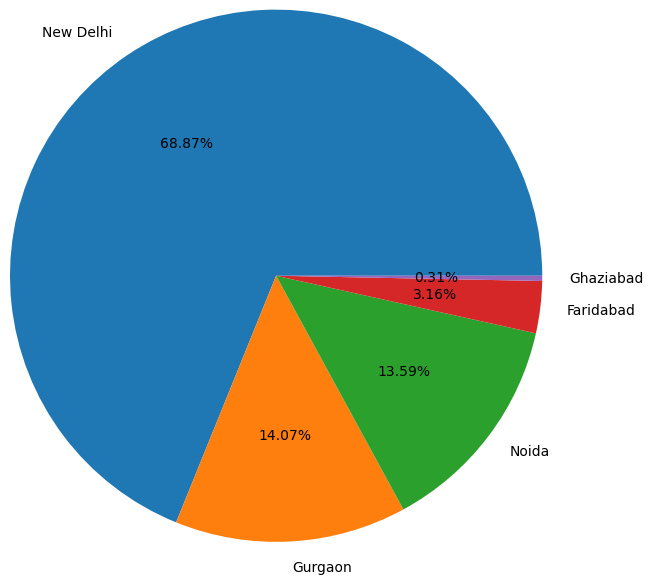

In [39]:
plt.pie(x=city_val[:5],labels=city_name[:5],autopct='%1.2f%%',radius=1.8)
plt.show()

## Oservation 8 :
8.1 - Top five Cities That Uses Zomato Are From India<br>
8.2 - Top Five Cities which used Zomato Are New Delhi , Gurgoan , Noida , Faridabad , Ghaziabad 


## Report Of Observation :

##### Observation 1 :
1.1 - Zomato most transactions/records are from India followed by United States and United Kingdom<br>


##### Observation 2 :

2.1 - The Aggregate rating that ranges from 1.8 to 2.4 have Rating Color Red and Rating text as Poor<br>
2.2 - The Aggregate rating that ranges from 2.5 to 3.4 have Rating Color Orange and Rating text as Average<br>
2.3 - The Aggregate rating that ranges from 3.5 to 3.9 have Rating Color Yellow and Rating text as Good<br>
2.4 - The Aggregate rating that ranges from 4.0 to 4.4 have Rating Color Green and Rating text as Very Good<br>
2.5 - The Aggregate rating that ranges from 4.5 to 4.9 have Rating Dark Green and Rating text as Excellent<br>
2.6 - Maximum number of Peoples have not provided any Ratings<br> 

##### Observation 3 :

3.1 - Maximum Number Of People does not rated<br> 
3.2 - Maximum Ratings are between 2.5 to 3.4<br>

##### Observation 4 :

4.1-Maximum NUmber of People have given Average Rating(Orange Color)<br>

##### Observation 5 :

5.1 - Maximum Number of 0 Zero Ratings are from Indian Customers<br>


##### Observation 6 :
6.1 - Only UAE and India(specific City) Have Online Delivery System<br>
6.2 - Some Cities(Agra , Vizag etc) Of India Does Not Have Online Delivery System<br>


##### Observation 7 :
7.1 -  Some Cities Of India(Agra , Vizag etc) Does Not Have Online Table Booking  System<br>


##### Oservation 8 :
8.1 - Top five Cities That Uses Zomato Are From India<br>
8.2 - Top Five Cities which used Zomato Are New Delhi , Gurgoan , Noida , Faridabad , Ghaziabad 
